In [157]:
from platform import python_version

print(python_version())

3.9.7


In [158]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [159]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

In [160]:
'''
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath)
'''

"\nprint(filepaths)\nprint('\n')\nprint(filenameList)\nprint('\n')\nprint(fullPath)\n"

In [161]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

T = 5000 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
files_total = len(fullPath)
i = 1
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    #print(df_local)
    print(f"Imported file number: {i}, from files total: {files_total}, and that is {i*100/files_total:.2f}%")
    df = df.append(df_local)
    i+=1

In [162]:
T = 'N' #5000 # describes which rows multiplied by n should be taken into the dataset #If chosen parameter is N the rows will not get dropped
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df_0 = pd.DataFrame()
df_1 = pd.DataFrame()

files_total = len(fullPath)
i = 1
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    if T != 'N':
        df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_1 = df_1.append(df_local)
    else:
        df_0 = df_0.append(df_local)
    #neo = re.findall('\/([\d]{1,2})\/', path)
    #df_local.insert(0,'neonate', str(neo))
    #print(df_local)
    print(f"Imported file number: {i}, from files total: {files_total}, and that is {i*100/files_total:.2f}%")
    i+=1

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
Imported file number: 1, from files total: 98, and that is 1.02%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/R/CsvLogBase_2022-01-15_235231.870_fast_Unknown.csv
Imported file number: 2, from files total: 98, and that is 2.04%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/B/CsvLogBase_2022-03-22_190208.416_fast_Unknown.csv
Imported file number: 3, from files total: 98, and that is 3.06%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/R/CsvLogBase_2022-03-22_145436.972_fast_Unknown.csv
Imported file number: 4, from files total: 98, and that is 4.08%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/B/CsvLogBase_2022-03-24_155741.211_fast_Unknown.csv
Imported file number: 5, from files total: 98, and that is 5.10%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/R/CsvLogBase_2022-03-23_192319.765_fast_Unknown.csv
Imported file number: 6, from files total: 98, and that is 6.12%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/B/CsvL

In [163]:
df_0

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-1.844,937.0
1,NaN,NaN
2,NaN,931.0
3,NaN,NaN
4,-1.927,919.0
...,...,...
2788087,NaN,NaN
2788088,NaN,NaN
2788089,NaN,NaN
2788090,NaN,NaN


In [164]:
df_1

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-0.155,-45.0
1,NaN,NaN
2,NaN,-60.0
3,NaN,NaN
4,-0.069,-73.0
...,...,...
1935557,NaN,NaN
1935558,0.064,-235.0
1935559,NaN,NaN
1935560,NaN,-235.0


In [165]:
data = [df_0,df_1]

In [166]:
len(data)

2

In [167]:
data[1]

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-0.155,-45.0
1,NaN,NaN
2,NaN,-60.0
3,NaN,NaN
4,-0.069,-73.0
...,...,...
1935557,NaN,NaN
1935558,0.064,-235.0
1935559,NaN,NaN
1935560,NaN,-235.0


In [168]:
for i in range(2):
    print(data[i], end = "\n")
    

         Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0                                       -1.844   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                       -1.927   
...                                        ...   
2788087                                    NaN   
2788088                                    NaN   
2788089                                    NaN   
2788090                                    NaN   
2788091                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  
0                                    937.0  
1                                      NaN  
2                                    931.0  
3                                      NaN  
4                                    919.0  
...                                    ...  
2788087                                NaN  
2788088                                

#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [169]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
#df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
#FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
#State = FinalData[['position']].copy()
#Neonate = FinalData[['neonate']].copy()
#FinalData.drop('position', axis=1, inplace=True)
#FinalData.drop('neonate', axis=1, inplace=True)

for i in range(len(data)):
    data[i] = data[i].rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
    print(data[i].isna().sum())

RESP.ONLY_ONE_IN_GROUP[OHM]    97566170
SPO2.SPO2_PULSE[COUNTS]        69277780
dtype: int64
RESP.ONLY_ONE_IN_GROUP[OHM]    99252699
SPO2.SPO2_PULSE[COUNTS]        69324814
dtype: int64


In [170]:
#FinalData.isna().sum()

# Interpolation of missing values

In [171]:
for i in range(len(data)):
    data[i] = data[i].interpolate()

In [172]:
for i in range(len(data)):
    data[i] = data[i].rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
    print(f'Number of blank spaces for the {i} position: \n {data[i].isna().sum()}')
    print(data[i].dtypes.value_counts())
    print(data[i].describe(), end = '\n')

Number of blank spaces for the 0 position: 
 RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64
float64    2
dtype: int64
       RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                 1.258703e+08             1.258703e+08
mean                 -3.022218e-02             1.156634e+01
std                   1.295571e+00             6.452088e+02
min                  -8.192000e+00            -8.192000e+03
25%                  -3.490000e-01            -1.205000e+02
50%                  -6.000000e-03            -5.000000e-01
75%                   2.937500e-01             1.100000e+02
max                   8.191000e+00             8.191000e+03
Number of blank spaces for the 1 position: 
 RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64
float64    2
dtype: int64
       RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                 1.292542e+08             1.292542e+08
mean                 -6.972681e-03      

In [173]:
#FinalData.plot()

In [174]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [175]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [176]:
#State

In [177]:
#State.describe()

In [178]:
#Neonate

In [179]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [180]:
#df_local

In [181]:
#!pip install sweetviz

# Visualization of the chosen columns

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



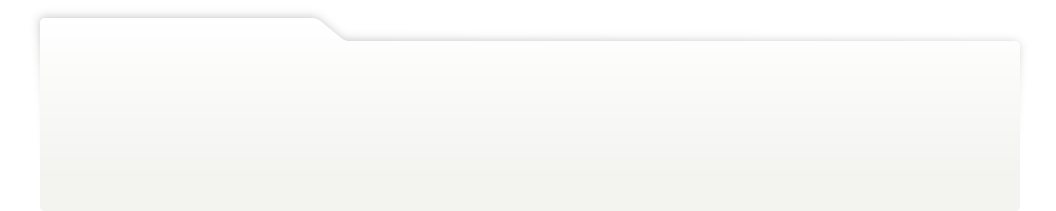
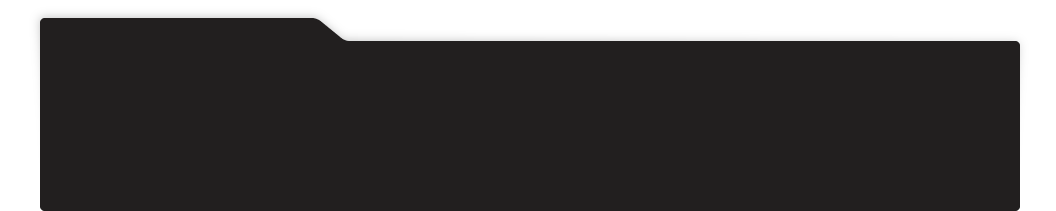
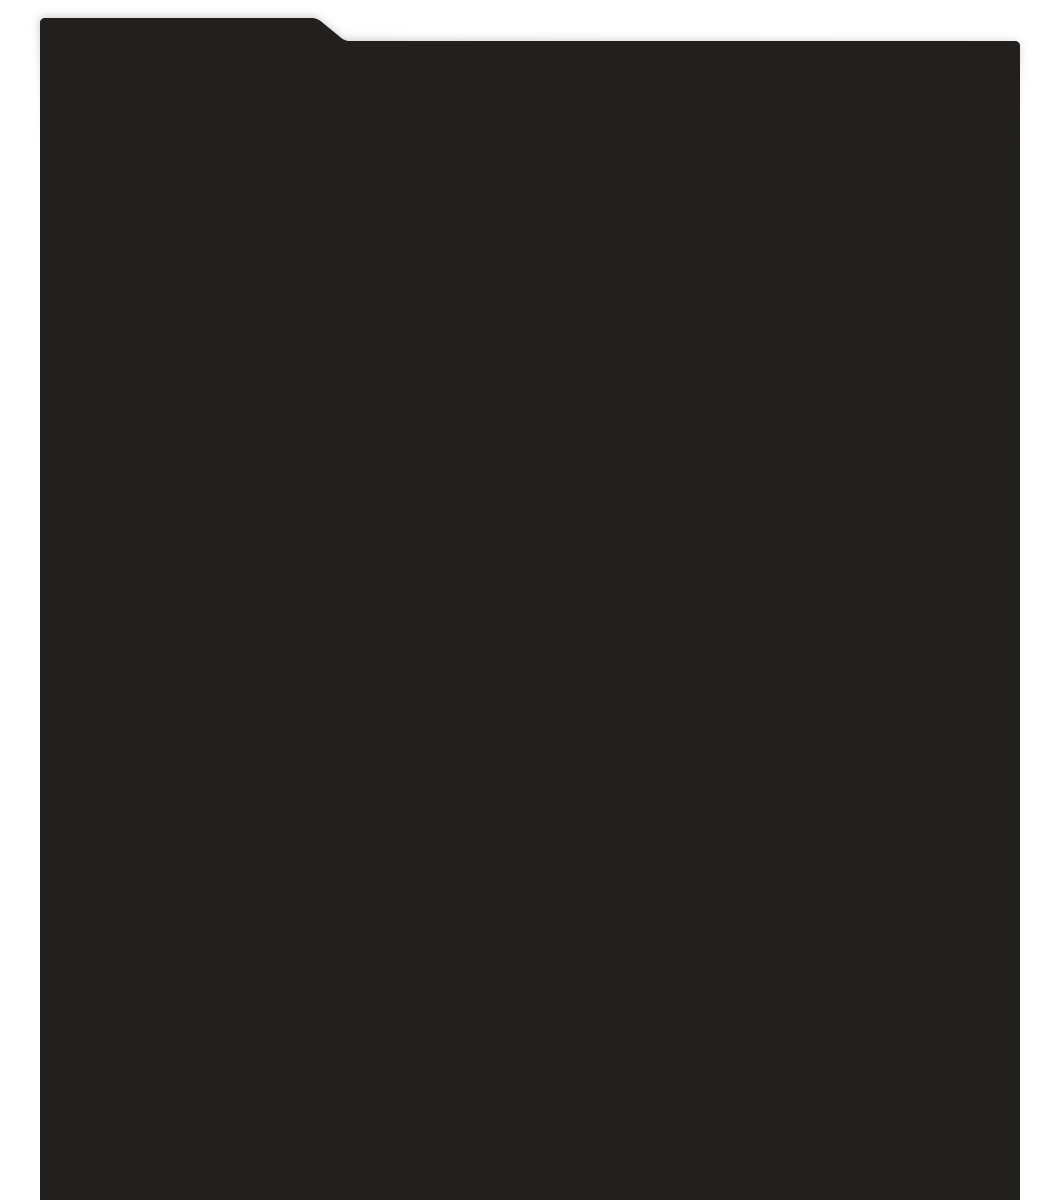
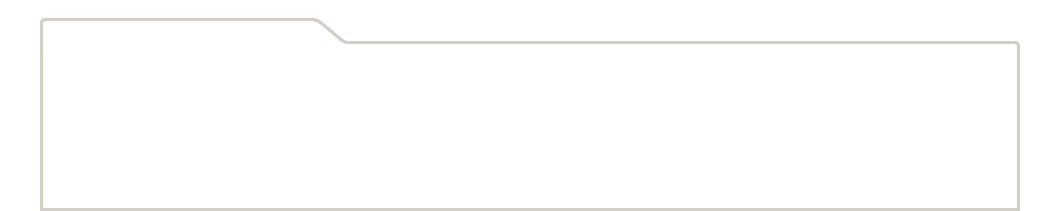
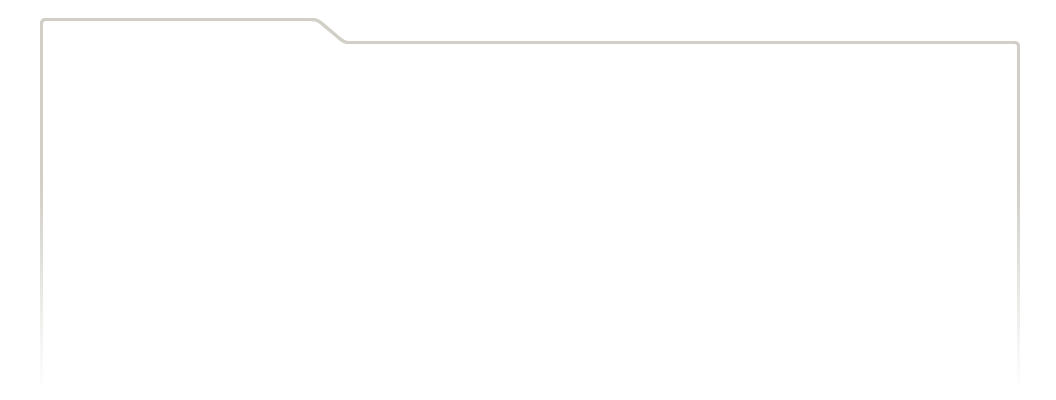
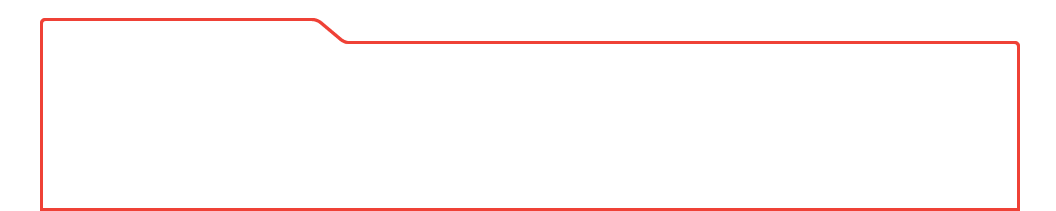
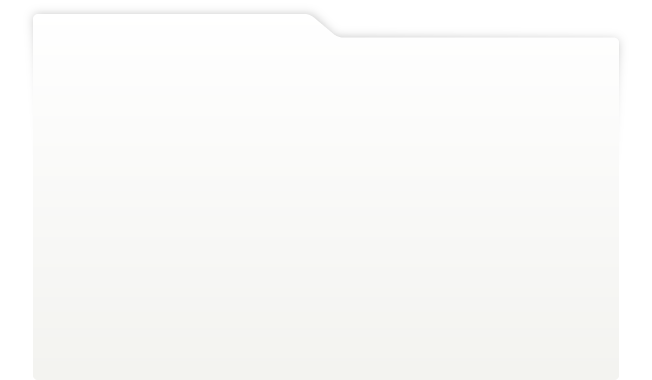
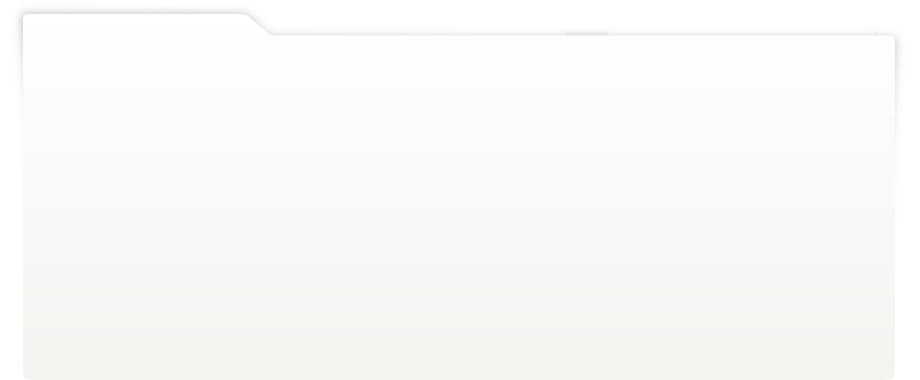
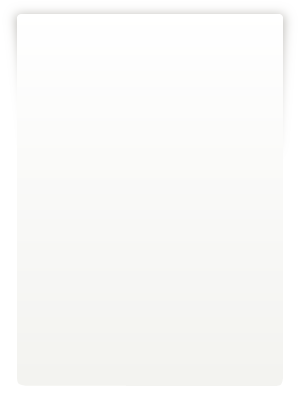
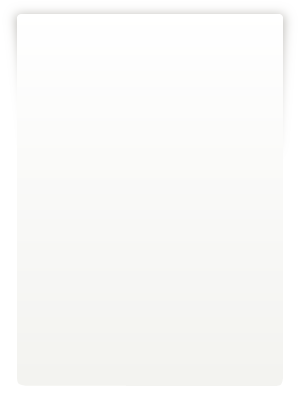
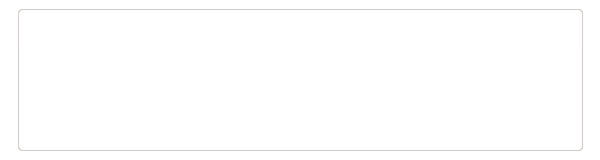
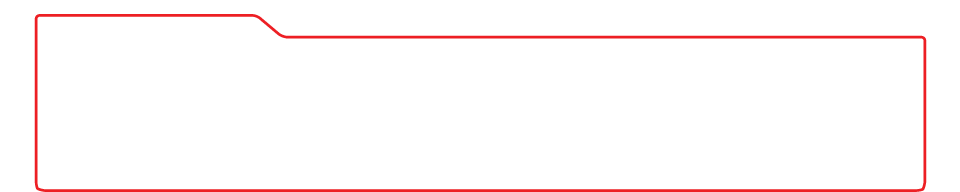
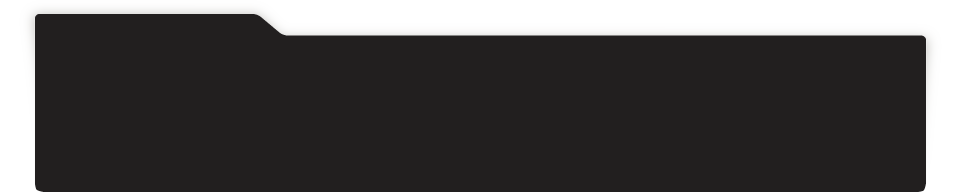
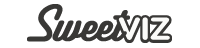
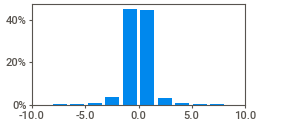
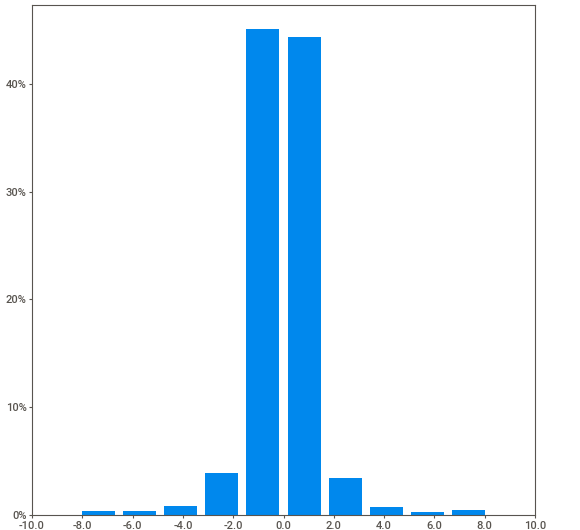
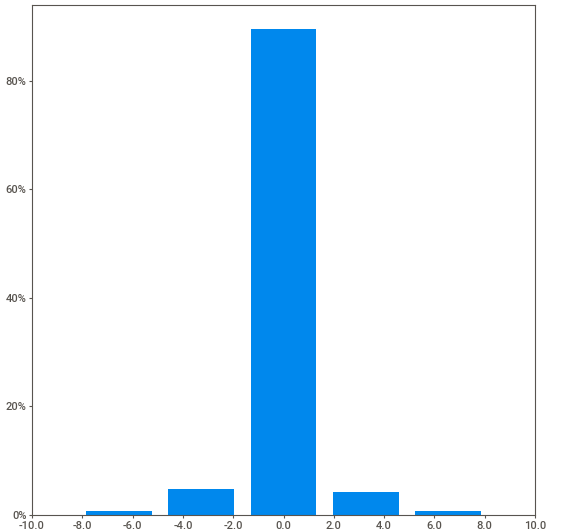
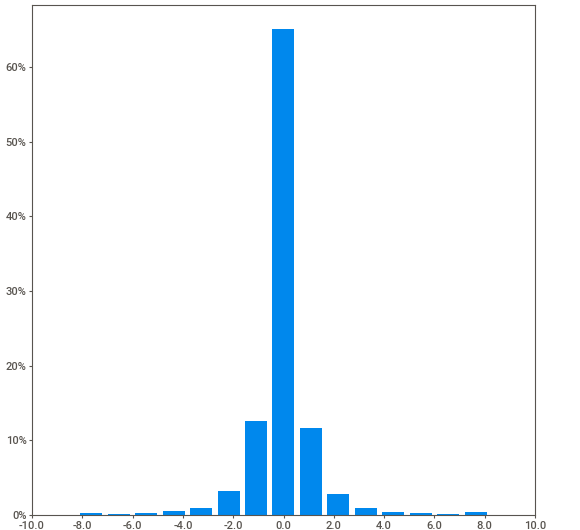
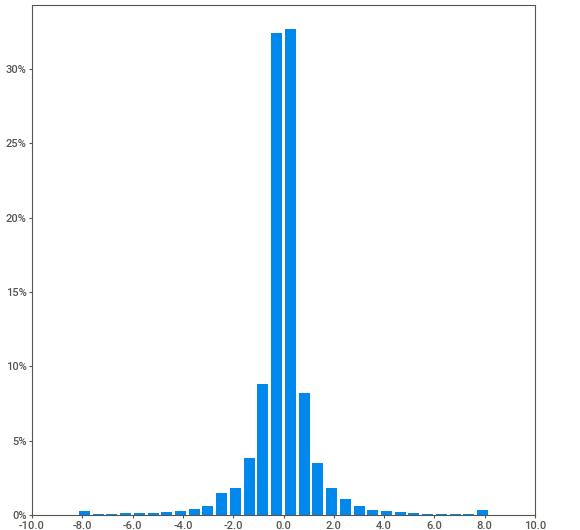
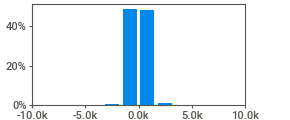
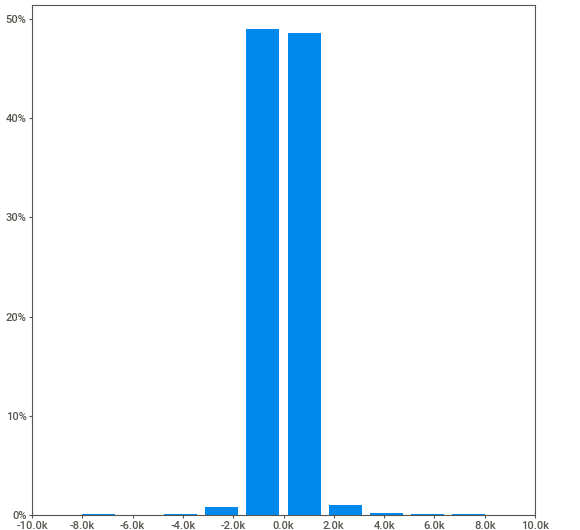
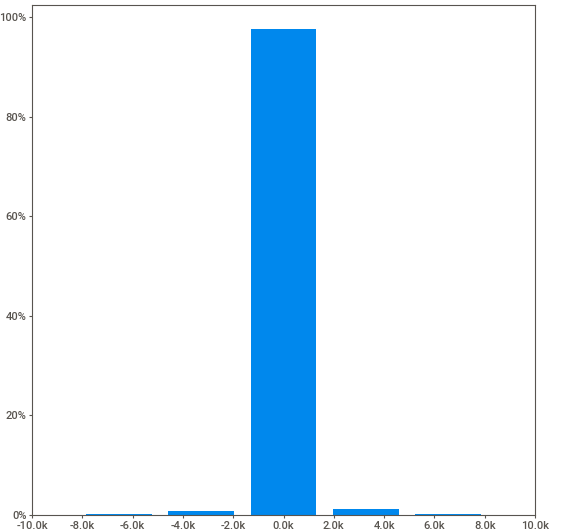
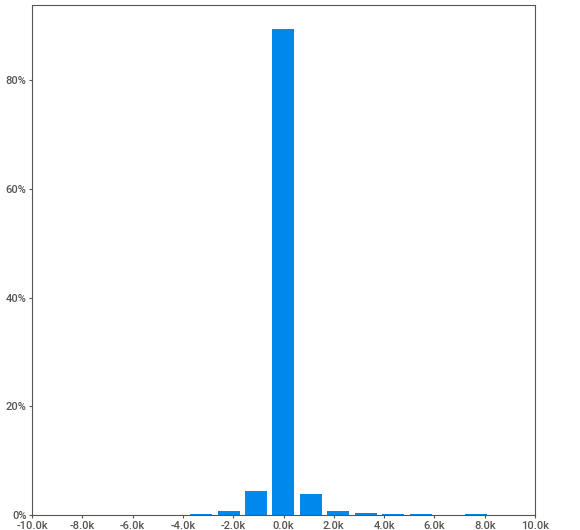
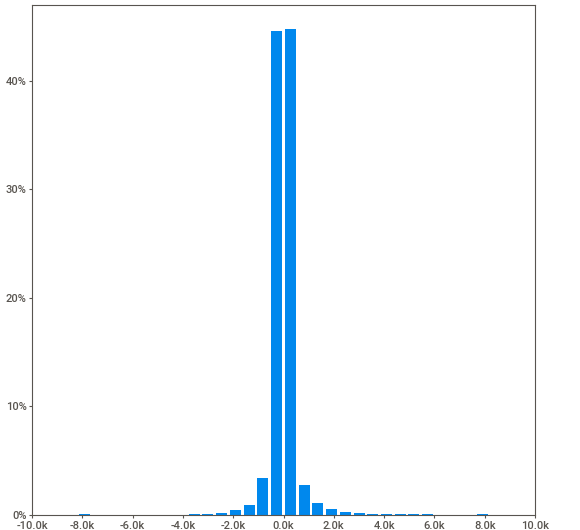
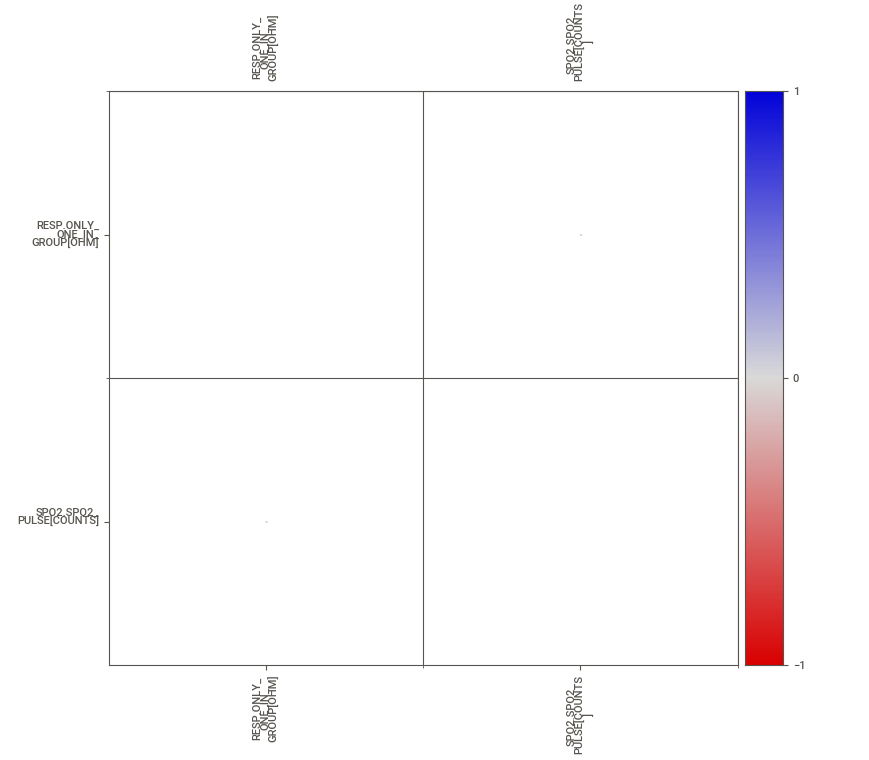
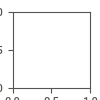

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



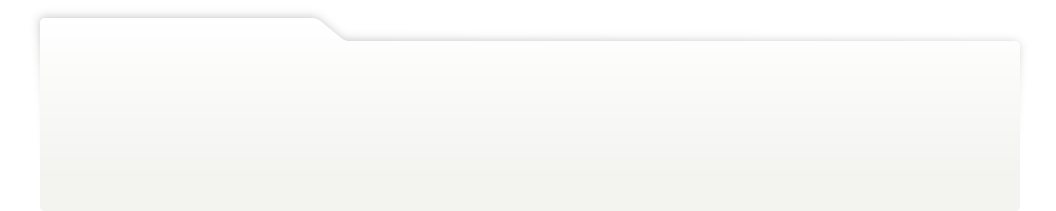
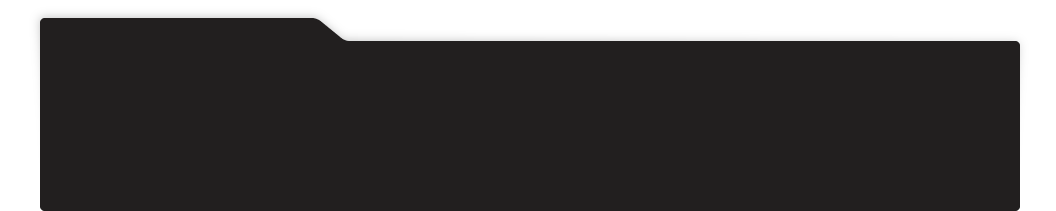
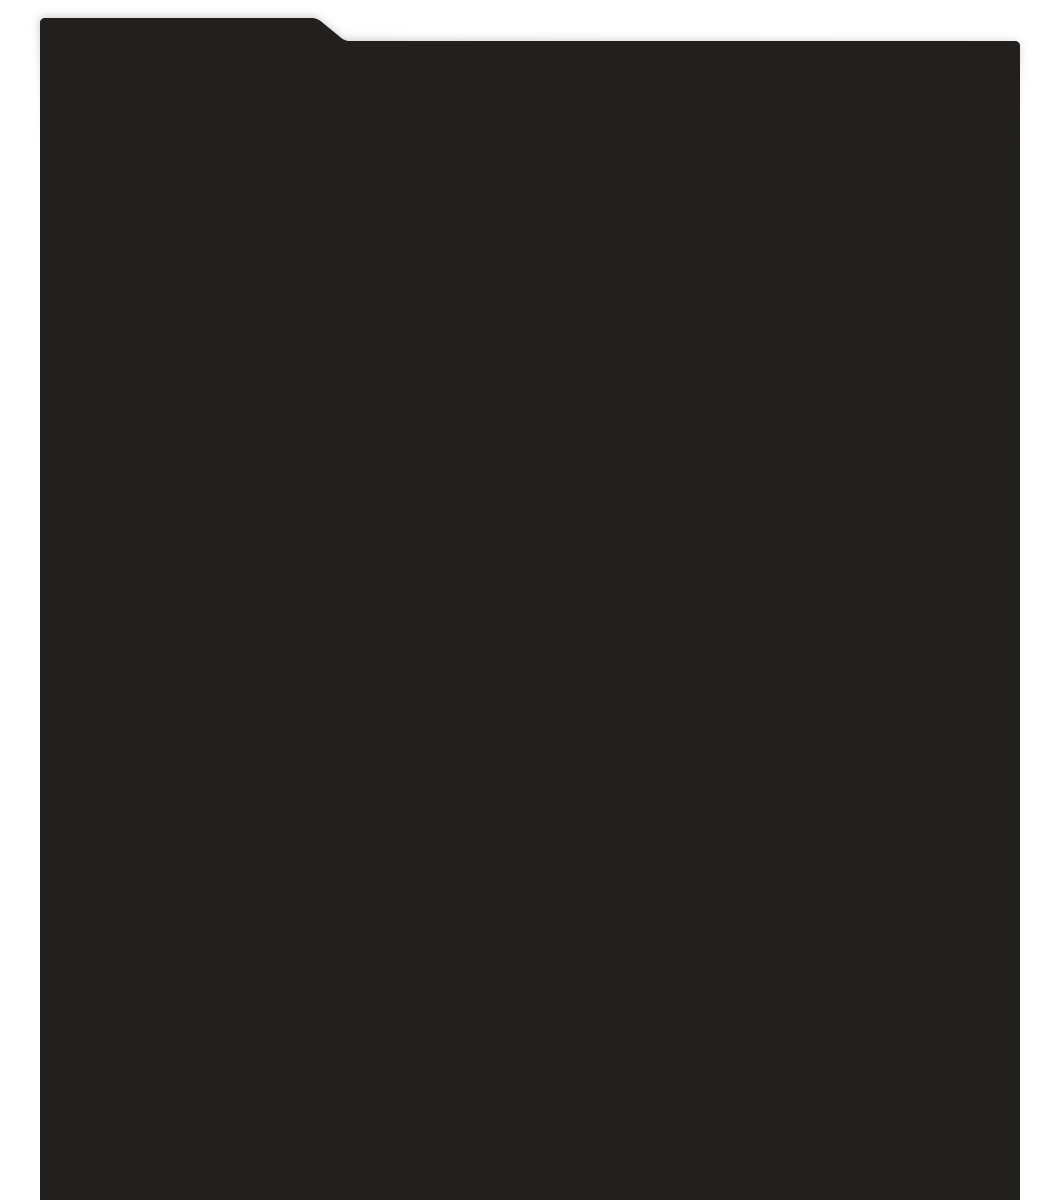
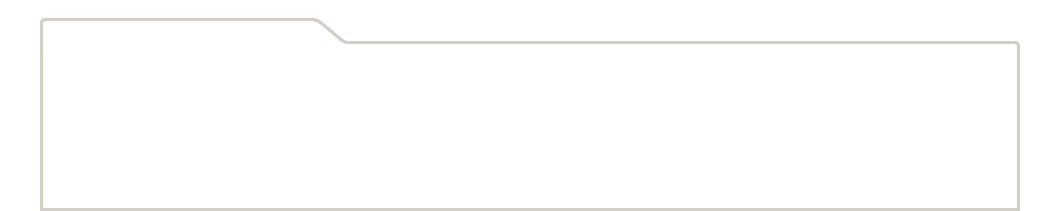
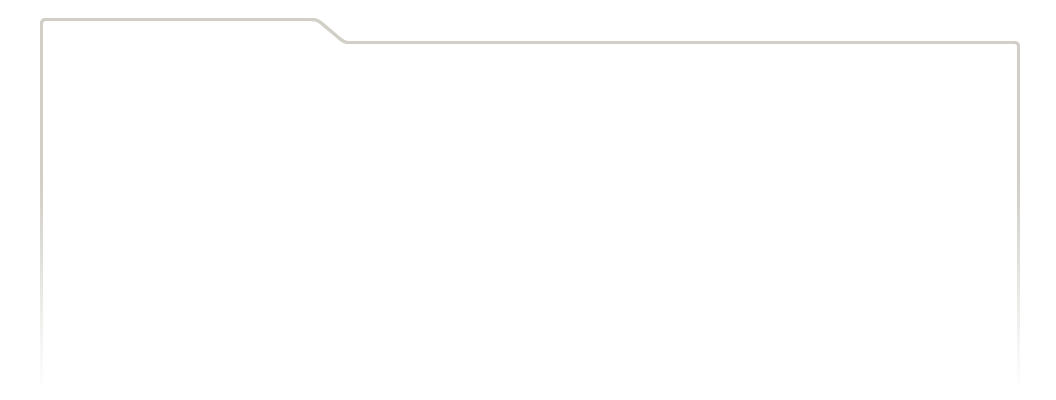
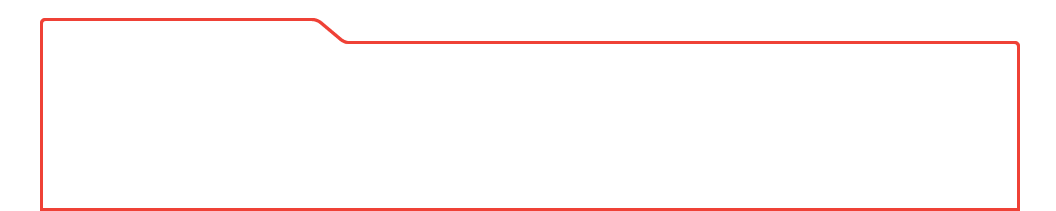
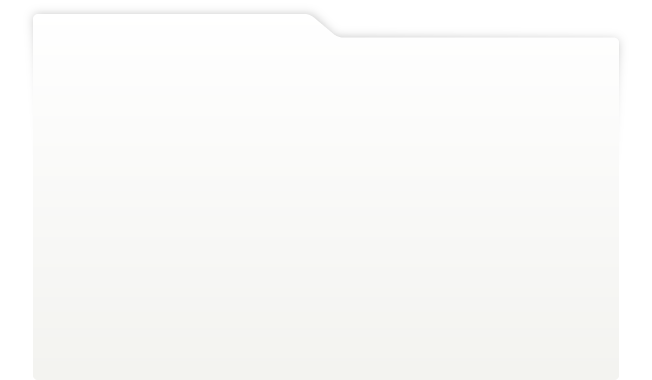
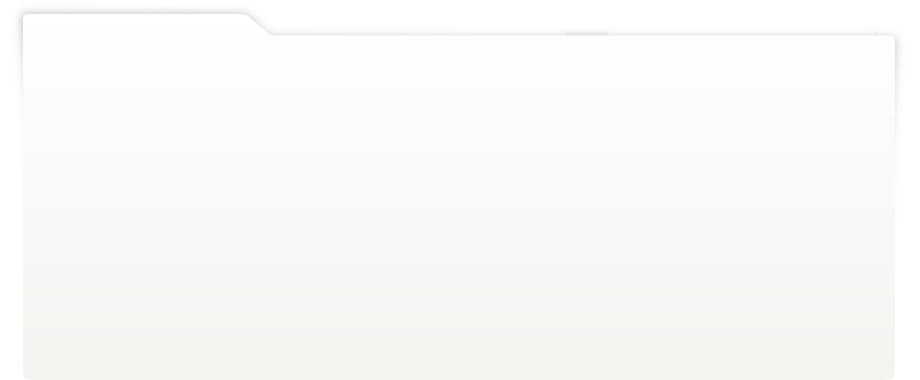
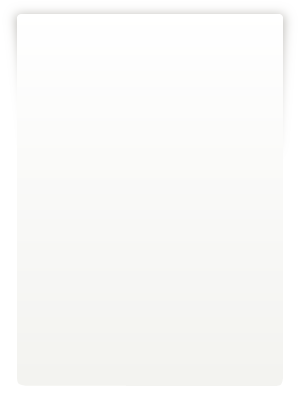
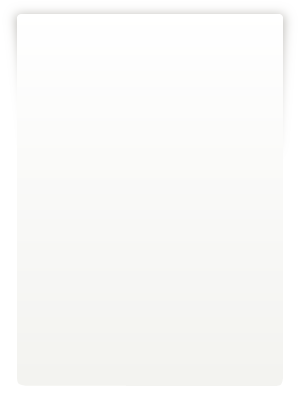
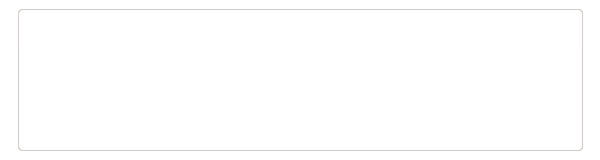
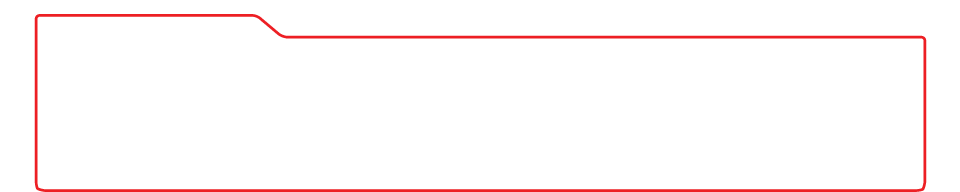
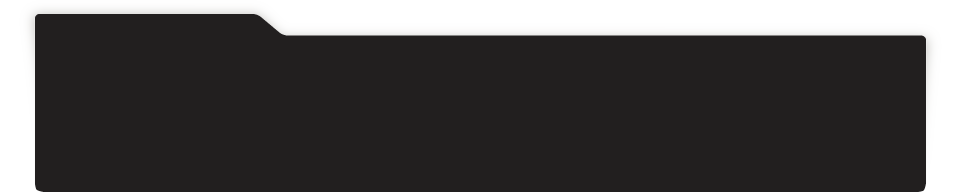
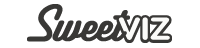
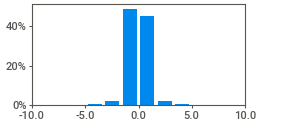
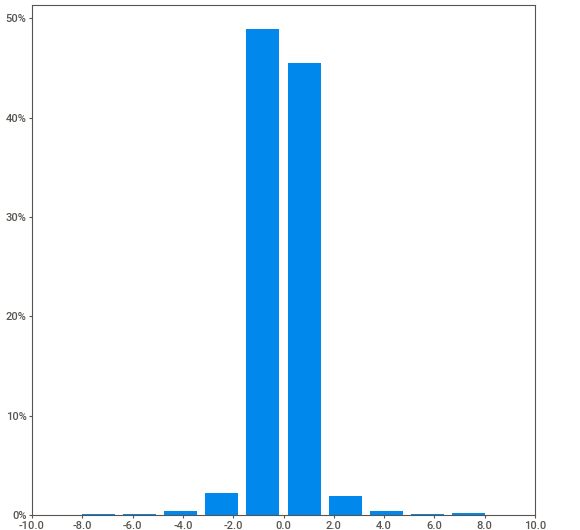
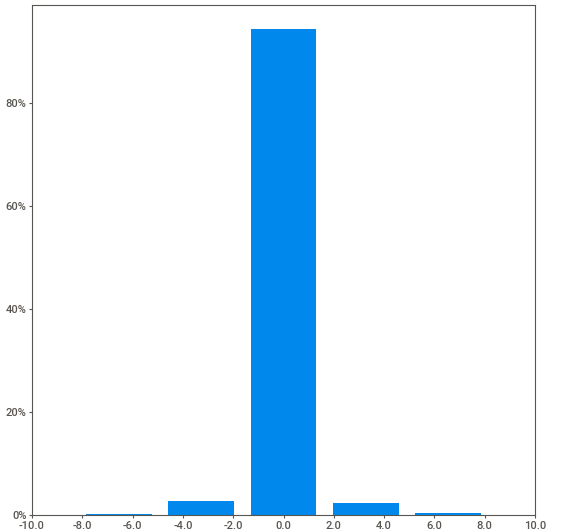
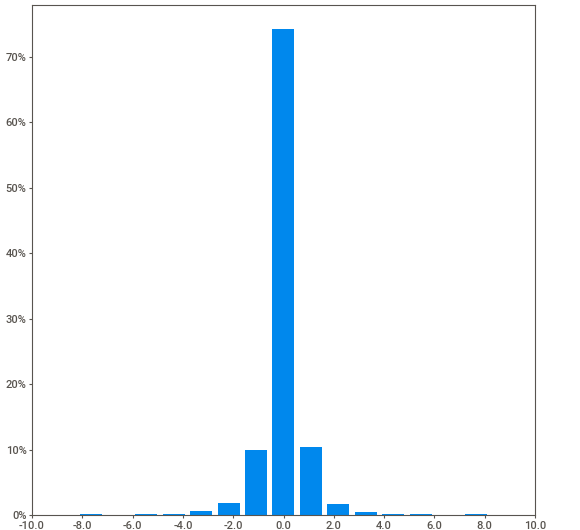
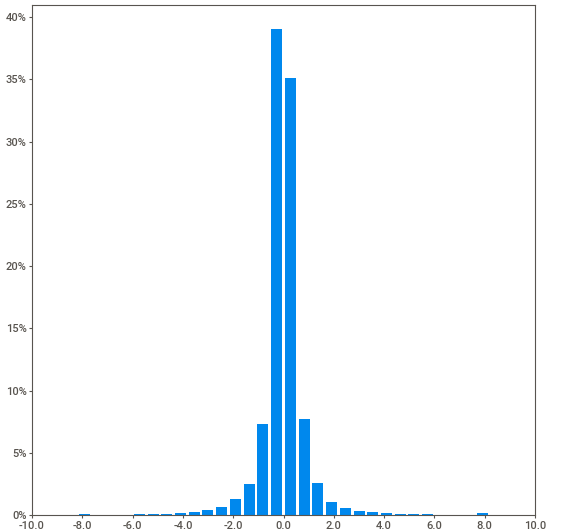
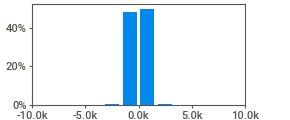
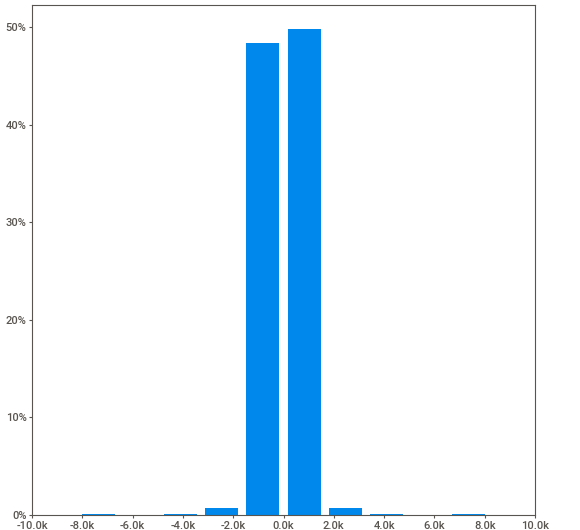
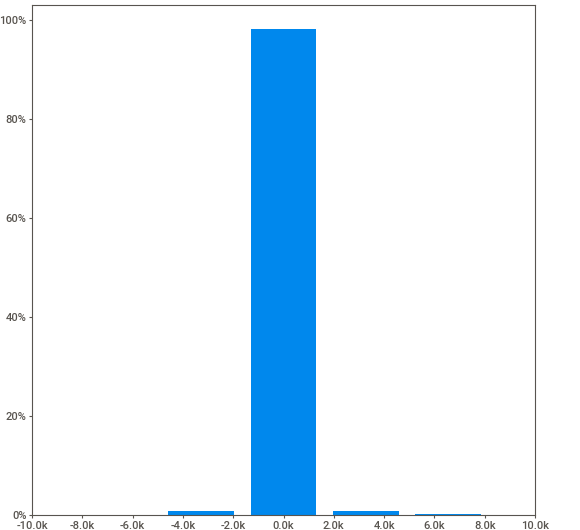
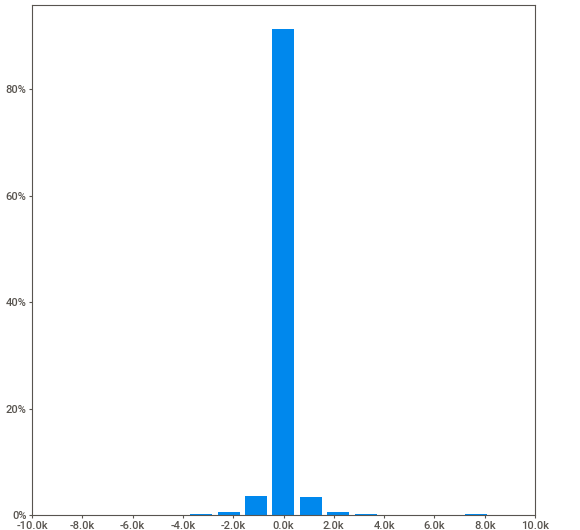
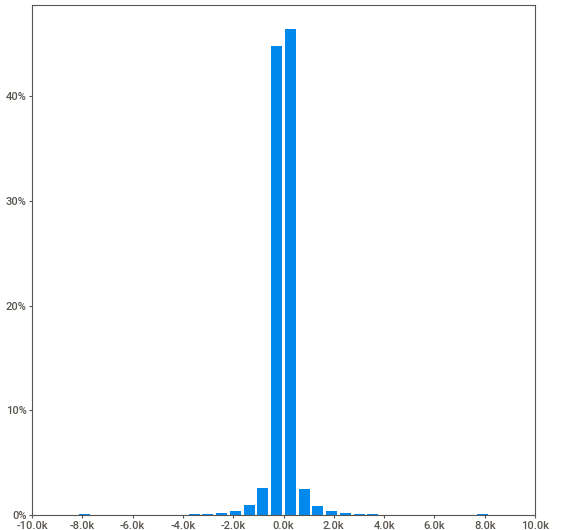
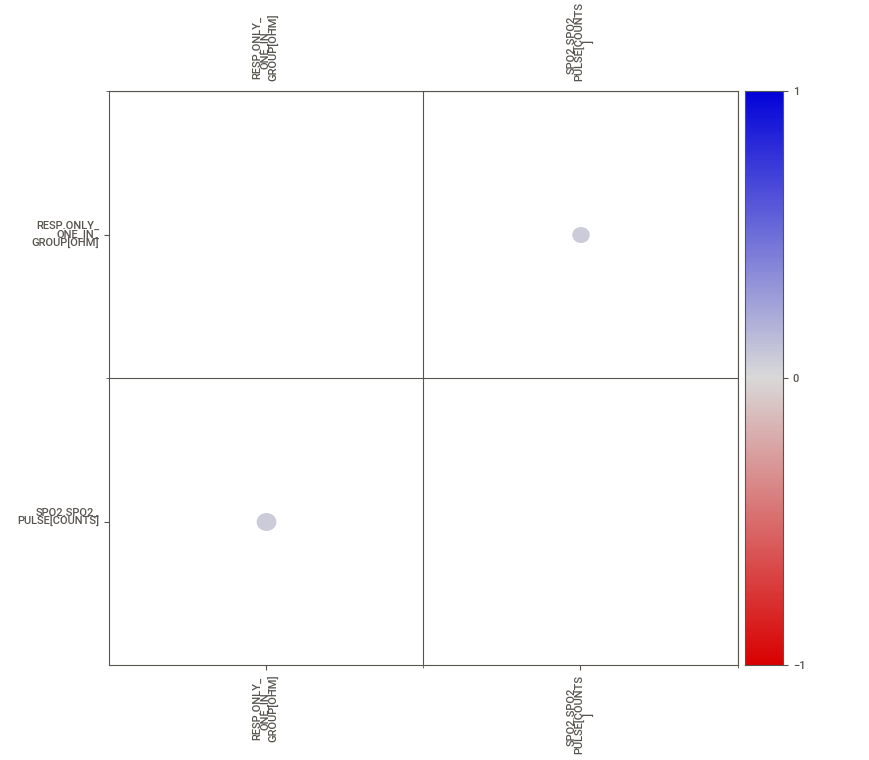
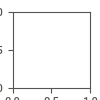

In [182]:
import sweetviz as sv
for i in range(len(data)):
    orig_data_report = sv.analyze(data[i], pairwise_analysis = 'on')
    orig_data_report.show_notebook()

# Data segmentation

import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 100 # Size of the data segments, earlier there was the value of 60
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

In [183]:
import math
import numpy as np

def segmentation(pd_data, shape):
    np_data = pd_data.to_numpy()
    nb_timestamps, nb_sensors = shape
    window_size = 100 # Size of the data segments, earlier there was the value of 60
    timestamp_idx = 0 # Index along the timestamp dimension
    segment_idx = 0 # Index for the segment dimension
    
    nb_segments = int(math.floor(nb_timestamps/window_size))
    print(f'Starting segmentation with a window size of {window_size} resulting in {nb_segments} segments.')
    data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)

    while segment_idx < nb_segments:
        data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
        timestamp_idx += window_size
        segment_idx += 1
    return data_to_save

To poniżej powinno być tablicą, a na razie nie jest - czyta na razie tylko wartość (chociaż nawet to nie), ale nigdzie ich nie zapisuje

In [184]:
position = []
for i in range(len(data)):
    shape = np.array(data[i]).shape
    print(shape)
    segmented = segmentation(data[i], shape)
    print(segmented)
    position.append(segmented)
    
    

(125870260, 2)
Starting segmentation with a window size of 100 resulting in 1258702 segments.
[[[-1.84400e+00  9.37000e+02]
  [-1.86475e+00  9.34000e+02]
  [-1.88550e+00  9.31000e+02]
  ...
  [-2.95500e-01 -7.83000e+02]
  [-2.46000e-01 -7.80000e+02]
  [-1.96500e-01 -7.75000e+02]]

 [[-1.47000e-01 -7.70000e+02]
  [-9.10000e-02 -7.64000e+02]
  [-3.50000e-02 -7.58000e+02]
  ...
  [ 1.82875e+00  1.29000e+02]
  [ 1.80950e+00  1.37000e+02]
  [ 1.79025e+00  1.45500e+02]]

 [[ 1.77100e+00  1.54000e+02]
  [ 1.75375e+00  1.62500e+02]
  [ 1.73650e+00  1.71000e+02]
  ...
  [ 3.10750e-01  1.62000e+02]
  [ 3.00500e-01  1.57000e+02]
  [ 2.90250e-01  1.52500e+02]]

 ...

 [[-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.68000e+02]
  ...
  [-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.68000e+02]]

 [[-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.68000e+02]
  ...
  [-2.55600e+00 -1.68000e+02]
  [-2.55600e+00 -1.680

In [185]:
for i in range(len(position)):
    print(position[i].shape)

(1258702, 100, 2)
(1292542, 100, 2)


In [186]:
for i in range(len(position)):
    position[i]

In [187]:
position[1]

array([[[-1.5500e-01, -4.5000e+01],
        [-1.3350e-01, -5.2500e+01],
        [-1.1200e-01, -6.0000e+01],
        ...,
        [-2.0900e-01, -7.3000e+01],
        [-2.1200e-01, -7.3000e+01],
        [-2.1500e-01, -7.3000e+01]],

       [[-2.1800e-01, -7.3000e+01],
        [-2.2025e-01, -7.1500e+01],
        [-2.2250e-01, -7.0000e+01],
        ...,
        [-1.9750e-01,  1.1500e+02],
        [-1.6900e-01,  1.2400e+02],
        [-1.4050e-01,  1.3100e+02]],

       [[-1.1200e-01,  1.3800e+02],
        [-8.5500e-02,  1.4250e+02],
        [-5.9000e-02,  1.4700e+02],
        ...,
        [-2.6175e-01,  1.7500e+01],
        [-2.8150e-01,  9.0000e+00],
        [-3.0125e-01,  2.0000e+00]],

       ...,

       [[ 2.5000e-02, -1.7200e+02],
        [ 2.7500e-02, -1.7450e+02],
        [ 3.0000e-02, -1.7700e+02],
        ...,
        [-2.5100e-01, -1.5500e+01],
        [-2.5500e-01, -1.6000e+01],
        [-2.5900e-01, -1.6000e+01]],

       [[-2.6300e-01, -1.6000e+01],
        [-2.6975e-01, -1.60

In [188]:
for i in range(len(position)):
    chunk_size = position[i].shape[1]
    print(chunk_size)

100
100


In [189]:
#old
'''
F = 200 # Data frequency of 200HZ
labels = []
def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 6
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/F
        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)
        labels[i] = labels_to_save[i]
    #features = features.reshape(num_chunks, num_features, num_sensors)
    return features
'''

'\nF = 200 # Data frequency of 200HZ\nlabels = []\ndef extract_features(data_to_save, chunk_size):\n    num_chunks = data_to_save.shape[0]//chunk_size\n    num_features = 6\n    num_sensors = data_to_save.shape[2]\n    features = np.zeros((num_chunks, num_features*num_sensors))\n    for i in range(num_chunks):\n        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]\n        mean = np.mean(chunk, axis=(0, 1))\n        median = np.median(chunk, axis=(0, 1))\n        std = np.std(chunk, axis=(0, 1))\n        min_val = np.min(chunk, axis=(0, 1))\n        max_val = np.max(chunk, axis=(0, 1))\n        #arg_max = np.argmax(chunk, axis=(0, 1))\n        sum_val = np.sum(chunk, axis=(0, 1))/F\n        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)\n        labels[i] = labels_to_save[i]\n    #features = features.reshape(num_chunks, num_features, num_sensors)\n    return features\n'

# Saving array for further processing

In [190]:
data_to_save_copy = position.copy()

In [191]:
#from numba import cuda
import scipy
from scipy.stats import kurtosis, skew

# Feature extraction

In [192]:
global num_features
num_features = 8

def extract_features(extracted_data, chunk_size = position[0].shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = extracted_data.shape[0]//chunk_size
    #global num_features
    #num_features = 8
    num_sensors = extracted_data.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    
    for i in range(num_chunks):
        chunk = extracted_data[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/freq
        # Perform FFT on the chunk of data
        #argmax_list = []
        #fft_argmax_list = []
        for j in range(num_sensors):
            kurtosis = scipy.stats.kurtosis(chunk[j,])
            skew = scipy.stats.skew(chunk[j,])
            '''
            fft_vals = np.fft.fft(chunk[j,])
            fft_sum = np.sum(np.abs(fft_vals))
            fft_sums.append(fft_sum)    
            argmax = np.argmax(chunk[j,])
            argmax_list.append(argmax)
            argmax_list = [x for x in argmax_list if x > 0]
        fft_sums = np.array(fft_sums)/freq
        # Calculate the corresponding frequency values
        freqs = np.fft.fftfreq(chunk.shape[0], 1/freq)
        '''
            
        #    fft_vals = np.fft.fft(chunk[j,])
                        #print(fft_vals)
        #    fft_sum = np.sum(np.abs(fft_vals))/freq
                        #print(fft_sum)
            
        #    argmax = np.argmax(fft_vals)
        #    argmax_val = fft_vals[argmax]
                        #fft_argmax_list.append(argmax_test)
                        #print(argmax_test)
                        #argmax = np.argmax(chunk[j,])
                        #argmax_list.append(argmax)
        #print("fft_argmax_list", fft_argmax_list)
        #print("Argmax list", argmax_list)
            
        
        features[i,:] = np.concatenate([mean, median, std, min_val, max_val, sum_val, kurtosis, skew])
        global feature_names
        feature_names = ['mean', 'median', 'std', 'min_val', 'max_val', 'sum_val', 'kurtosis', 'skew',\
            'mean_2', 'median_2', 'std_2', 'min_val_2', 'max_val_2', 'sum_val_2', 'kurtosis_2', 'skew_2',]
    return features



# Number of samples
#N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
#frequencies = np.fft.fftfreq(N, 1/sampling_rate)

def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 4
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        features[i,:] = np.hstack([mean, median, std, min_val]).flatten()
    features = features.reshape(num_chunks, num_features, num_sensors)
    return features


In [193]:
def labeling():
    extracted_features = []
    for i in range(len(position)):
        extracted_features.append(extract_features(position[i]))
        #print(extracted_features)
    
    position_0 = extract_features(position[0])
    position_1 = extract_features(position[1])
    
    labels_0 = np.zeros(position_0.shape[0])
    labels_1 = np.ones(position_1.shape[0])
    
    complete_feature_dataset = np.concatenate((position_0,position_1))
    complete_label_dataset = np.concatenate((labels_0, labels_1))
    
    return complete_feature_dataset, complete_label_dataset

In [194]:
#labeling()

In [195]:
#len(extracted_features)

In [196]:
#position_0 = extract_features(position[0])
#position_1 = extract_features(position[1])

In [197]:
#position_0.size
#position_0.shape

In [198]:
#labels_0 = np.zeros(position_0.shape[0])
#labels_1 = np.ones(position_1.shape[0])

In [199]:
#complete_feature_dataset = np.concatenate((position_0,position_1))

In [200]:
#complete_label_dataset = np.concatenate((labels_0, labels_1))

In [201]:
#complete_feature_dataset.shape

In [202]:
#complete_label_dataset.shape

In [203]:
#complete_label_dataset

#labels = np.squeeze(labels)

#%debug

In [204]:
#new_array = new_array.flatten()

In [205]:
#new_array

In [206]:
#set(labels_to_save)

In [207]:
#labels_to_save

###Creating an additional table called Saved_data for further actions

In [208]:
#Saved_data = complete_feature_dataset

In [209]:
#Saved_data.shape

In [210]:
#data_to_save = np.array(data_to_save) # this is the 3D array
#data_to_save = data_to_save.reshape(data_to_save.shape[0], -1) # reshape to 2D array

## Data shuffling

In [211]:
#labels_to_save = labels
#labels_to_save.shape

In [212]:
from sklearn.preprocessing import LabelEncoder
def data_shuffling():
    dataset = labeling()
    shuffler = np.random.permutation(len(dataset[0]))
    X = dataset[0][shuffler]
    y = dataset[1][shuffler]

    return X,y
#le = LabelEncoder()
#y = le.fit_transform(y)

In [213]:
#data_shuffling()

# Recursive feature elimination

In [214]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [215]:
'''
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nmodel = LogisticRegression(max_iter=1000)\nrfe = RFE(model, 6)\nfit = rfe.fit(X, y)\n\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [216]:
'''
model = RandomForestClassifier()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nmodel = RandomForestClassifier()\nrfe = RFE(model, 6)\nfit = rfe.fit(X, y)\n\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [217]:
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# create the RFE model and select 6 attributes
svm = SVC(kernel="linear", C=1)
rfe = RFE(svm, 6)
fit = rfe.fit(X, y)

# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

'\nfrom sklearn.feature_selection import RFE\nfrom sklearn.svm import SVC\nfrom sklearn.datasets import load_digits\n\n# create the RFE model and select 6 attributes\nsvm = SVC(kernel="linear", C=1)\nrfe = RFE(svm, 6)\nfit = rfe.fit(X, y)\n\n# summarize the selection of the attributes\nprint("Selected Features: %s" % fit.support_)\nprint("Feature Ranking: %s" % fit.ranking_)\n'

In [218]:
'''
#models = [LogisticRegression(solver='liblinear', max_iter=1000), SVC(kernel='linear'), RandomForestClassifier()]
models = [LogisticRegression(solver='liblinear', max_iter=1000), RandomForestClassifier()]

for model in models:
    rfe = RFE(model, n_features_to_select=6)
    cv_scores = cross_val_score(rfe, X, y, cv=5)
    print("Model:", model.__class__.__name__)
    print("Selected Features:", rfe.fit(X, y).support_)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    
'''

'\n#models = [LogisticRegression(solver=\'liblinear\', max_iter=1000), SVC(kernel=\'linear\'), RandomForestClassifier()]\nmodels = [LogisticRegression(solver=\'liblinear\', max_iter=1000), RandomForestClassifier()]\n\nfor model in models:\n    rfe = RFE(model, n_features_to_select=6)\n    cv_scores = cross_val_score(rfe, X, y, cv=5)\n    print("Model:", model.__class__.__name__)\n    print("Selected Features:", rfe.fit(X, y).support_)\n    print("CV Scores:", cv_scores)\n    print("Mean CV Score:", cv_scores.mean())\n    \n'

In [219]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error

In [220]:
def feature_elimination(n = i):
    # Create the Random Forest classifier
    rf = RandomForestClassifier()

    # Perform feature selection using RFE
    rfe = RFE(estimator=rf, n_features_to_select=n, step=1)
    shuffled_dataset = data_shuffling()
    X = shuffled_dataset[0]
    y = shuffled_dataset[1]
    rfe.fit(X, y)

    # Get the selected feature indices
    selected_features = rfe.support_
    selected_features_indices = np.where(selected_features)[0]
    print(selected_features_indices)
    print(feature_names)

    
    le = LabelEncoder()
    y = le.fit_transform(y)
    # Use the selected features to train and evaluate the classifier
    global X_selected
    X_selected = X[:, selected_features]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    
    # Train the Random Forest classifier
    rf.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    mae = mean_absolute_error(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Mean Absolute Error:", mae)

In [221]:
#def xyz():
for i in range(num_features*2,0,-1):
    feature_elimination(i)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
['mean', 'median', 'std', 'min_val', 'max_val', 'sum_val', 'kurtosis', 'skew', 'mean_2', 'median_2', 'std_2', 'min_val_2', 'max_val_2', 'sum_val_2', 'kurtosis_2', 'skew_2']
Accuracy: 0.6586098771883983
Precision: 0.6585895786620863
Recall: 0.6586997244004535
Mean Absolute Error: 0.3413901228116018
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
['mean', 'median', 'std', 'min_val', 'max_val', 'sum_val', 'kurtosis', 'skew', 'mean_2', 'median_2', 'std_2', 'min_val_2', 'max_val_2', 'sum_val_2', 'kurtosis_2', 'skew_2']
Accuracy: 0.6613535406323491
Precision: 0.6613920066118122
Recall: 0.6614002059467816
Mean Absolute Error: 0.3386464593676509
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 15]
['mean', 'median', 'std', 'min_val', 'max_val', 'sum_val', 'kurtosis', 'skew', 'mean_2', 'median_2', 'std_2', 'min_val_2', 'max_val_2', 'sum_val_2', 'kurtosis_2', 'skew_2']
Accuracy: 0.658348575908022
Precision: 0.6585277643177184
Recall: 0.6585318894576752
Mea

In [1]:
n = int(input("Choose, with how mamny features do you want to continue"))
feature_elimination(n)

In [ ]:
#set(complete_label_dataset)

In [ ]:
#set(y)
#y.shape

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
'''
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LabelEncoder()
y = le.fit_transform(y)
'''

In [ ]:
print(X_train.size)
print(X_test.size)

In [ ]:
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# create the model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test set
rfc_prediction = rfc.predict(X_test)


acc = accuracy_score(y_test, rfc_prediction)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, rfc_prediction)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, rfc_prediction)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

# create the model
model = xgb.XGBClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn import svm

# create the model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [ ]:
'''
# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
'''

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds
n_folds = 5

# Create an instance of the KFold class
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)


In [ ]:
# Define the RFC model
rfc = RandomForestClassifier()

# Initialize a list to store the accuracy scores
acc_scores_RFC = []
precision_scores_RFC = []
recall_scores_RFC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_RFC.append(acc)
    precision_scores_RFC.append(precision)
    recall_scores_RFC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_RFC))
print("Mean precision:", np.mean(precision_scores_RFC))
print("Mean recall:", np.mean(recall_scores_RFC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the XGboost model
model = xgb.XGBClassifier()

# Initialize a list to store the accuracy scores
acc_scores_XGB = []
precision_scores_XGB = []
recall_scores_XGB = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_XGB.append(acc)
    precision_scores_XGB.append(precision)
    recall_scores_XGB.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_XGB))
print("Mean precision:", np.mean(precision_scores_XGB))
print("Mean recall:", np.mean(recall_scores_XGB))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the SVM model
SVM = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Initialize a list to store the accuracy scores
acc_scores_SVC = []
precision_scores_SVC = []
recall_scores_SVC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    SVM.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = SVM.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_SVC.append(acc)
    precision_scores_SVC.append(precision)
    recall_scores_SVC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_SVC))
print("Mean precision:", np.mean(precision_scores_SVC))
print("Mean recall:", np.mean(recall_scores_SVC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Power spectrum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
# Compute the FFT of the signal along the first axis
fft = np.fft.fft(Saved_data, axis=0)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Plot the power spectrum of 5 slices along the first axis
for i in range(25):
    plt.plot(power_spectrum[:, i, 0])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal (Slice {i})')
    plt.show()
'''

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(power_spectrum0[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(power_spectrum1[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Confusion matrix

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

# Sampling rate
sampling_rate = 200

# Number of samples
N = Saved_data.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies0 = np.fft.fftfreq(N, 1/sampling_rate)
frequencies1 = np.fft.fftfreq(N, 1/sampling_rate)

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(frequencies0, power_spectrum0[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(frequencies1, power_spectrum1[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Plots prepared for newly preprocessed data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the signal along the first axis for each sensor
fft = np.fft.fft(new_array, axis=0)

# Compute the power spectrum for each sensor
power_spectrum = np.abs(fft)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# Plot the power spectrum for each sensor
for i in range(new_array.shape[1]):
    plt.plot(frequencies, power_spectrum[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Sensor {i}')
    plt.show()